In [1]:
# Import sorted cities DF

import pandas as pd
df = pd.read_csv("cities_df.csv")

In [2]:
# Foursquare API credentials
CLIENT_ID = '1541HCSUYAL2RF5SNZA2NY0FO12SBRBBERE3P3SSEQX4YTRZ'
CLIENT_SECRET = 'MF3YCSCSXXNXS2KV24T2SDXSL41SC4YU1UB0MAZHQXN14UTV'
API_Key = 'fsq3TKGuUfLvNw8WCEoq3iJGWsitlgxhq7mhz9925lcv1Hk='


In [3]:
df

,neighborhood,longitude,latitude,borough
0,Wakefield,-73.847201,40.894705,Bronx
1,Co-op City,-73.829939,40.874294,Bronx
2,Eastchester,-73.827806,40.887556,Bronx
3,Fieldston,-73.905643,40.895437,Bronx
4,Riverdale,-73.912585,40.890834,Bronx
...,...,...,...,...
301,Hudson Yards,-74.000111,40.756658,Manhattan
302,Hammels,-73.805530,40.587338,Queens
303,Bayswater,-73.765968,40.611322,Queens
304,Queensbridge,-73.945631,40.756091,Queens


In [4]:
# Grab the location name, latitiude and longitude

location_latitude = df.loc[0, 'latitude'] 
location_latitude = "{:.4f}".format(location_latitude)

location_longitude = df.loc[0, 'longitude'] 
location_longitude = "{:.4f}".format(location_longitude)

location_name = df.loc[0, 'neighborhood']

print('Latitude and longitude values of {} are {}, {}.'.format(location_name, location_latitude, location_longitude))

Latitude and longitude values of Wakefield are 40.8947, -73.8472.


In [5]:
# import the foursquare api to pull venue information
import requests

radius = 5000
LIMIT = 50
headers = headers = {
    "Accept": "application/json",
    "Authorization": "fsq3eq/6XbeEH9xio7SUBJROcOlx0oLwMwucWObp8j2z8CA="
}

url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius={}&categories=15000&sort=DISTANCE&limit={}".format(
    location_latitude,
    location_longitude,
    radius,
    LIMIT)

results = requests.get(url, headers=headers).json()

results




{'results': [{'fsq_id': '31e782862d634296916e61fc',
   'categories': [{'id': 15000,
     'name': 'Health and Medicine',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
      'suffix': '.png'}}],
   'chains': [],
   'distance': 344,
   'geocodes': {'main': {'latitude': 40.891616, 'longitude': -73.84673},
    'roof': {'latitude': 40.891616, 'longitude': -73.84673}},
   'link': '/v3/places/31e782862d634296916e61fc',
   'location': {'address': '4064 Bruner Ave',
    'census_block': '360050426002001',
    'country': 'US',
    'dma': 'New York',
    'formatted_address': '4064 Bruner Ave, Bronx, NY 10466',
    'locality': 'Bronx',
    'neighborhood': ['Edenwald'],
    'postcode': '10466',
    'region': 'NY'},
   'name': 'Innervision Sonograph',
   'related_places': {}},
  {'fsq_id': '1e2918261093488d4799022d',
   'categories': [{'id': 15024,
     'name': 'Optometrist',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_opticals

In [6]:
venues = results['results']
df_care = pd.json_normalize(venues)




df_care = df_care.drop(columns=['fsq_id', 'chains', 'link', 'timezone', 'geocodes.roof.latitude', 'location.locality', 'location.postcode', 'location.region', 'related_places.children',
                     'related_places.parent.fsq_id', 'location.address_extended', 'location.address', 'location.census_block', 'location.cross_street', 'location.dma',
                     'related_places.parent.name', 'location.country', 'geocodes.roof.longitude', 'distance'])

# Split category further to get name only
categories_df = pd.DataFrame(df_care['categories'].tolist())
categories_df = categories_df.iloc[:, 0].apply(pd.Series)
categories_df = categories_df['name']

# Merge categories with venues
new_df = df_care.merge(categories_df, left_index=True, right_index=True)
new_df = new_df.drop(columns=['categories'])
new_df = new_df.rename(columns={"distance": "Distance",
                       "name_x": "Place_name",
                       "geocodes.main.latitude": "Latitude",
                       "geocodes.main.longitude": "Longitude",
                       "location.formatted_address": "Address",
                       "location.neighborhood": "Neighborhood",
                       "name_y": "Category_name"})


new_df.head()


,Place_name,Latitude,Longitude,Address,Neighborhood,Category_name
0,Innervision Sonograph,40.891616,-73.846730,"4064 Bruner Ave, Bronx, NY 10466",[Edenwald],Health and Medicine
1,Quality Control Optics,40.892631,-73.855572,"754 E 233rd St, Bronx, NY 10466",[Williamsbridge],Optometrist
2,Beth Abraham,40.903082,-73.848505,"740 Cranford Ave, Bronx, NY 10470",[Wakefield],Home Health Care Service
3,All Med Medical,40.899422,-73.858404,"4377 Bronx Blvd (Neried Ave), Bronx, NY 10466",[Wakefield],Doctor's Office
4,Our Lady of Mercy Dnt Clinic,40.895479,-73.860363,"4234 Bronx Blvd, Bronx, NY 10466",[Williamsbridge],Hospital


In [7]:
# Repeat the process for all neighborhood in Manhattan
def getNearbyCare(latitude, longitude, radius=5000):             
    radius = 5000
    LIMIT = 50
    headers = headers = {
        "Accept": "application/json",
        "Authorization": "fsq3eq/6XbeEH9xio7SUBJROcOlx0oLwMwucWObp8j2z8CA="}

    url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius={}&categories=15000&sort=DISTANCE&limit={}".format(
        latitude,
        longitude,
        radius,
        LIMIT)

    results1 = requests.get(url, headers=headers).json()

    return results1

    


In [8]:
df_nyc = pd.DataFrame()

for index, row in df.iterrows():
    df_results = getNearbyCare(row['latitude'], row['longitude'])
    df_results = df_results['results']
    df_all = pd.json_normalize(df_results)
    df_nyc = df_nyc.append(df_all)

    

    

In [9]:
df_nyc.head()

,fsq_id,categories,chains,distance,link,name,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,geocodes.roof.longitude,...,location.neighborhood,location.postcode,location.region,timezone,location.cross_street,location.address_extended,related_places.children,related_places.parent.fsq_id,related_places.parent.name,location.po_box
0,31e782862d634296916e61fc,"[{'id': 15000, 'name': 'Health and Medicine', ...",[],345,/v3/places/31e782862d634296916e61fc,Innervision Sonograph,40.891616,-73.846730,40.891616,-73.846730,...,[Edenwald],10466,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1e2918261093488d4799022d,"[{'id': 15024, 'name': 'Optometrist', 'icon': ...",[],740,/v3/places/1e2918261093488d4799022d,Quality Control Optics,40.892631,-73.855572,40.892631,-73.855572,...,[Williamsbridge],10466,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90bfdcd293bc4277417d9c27,"[{'id': 15012, 'name': 'Home Health Care Servi...",[],937,/v3/places/90bfdcd293bc4277417d9c27,Beth Abraham,40.903082,-73.848505,40.903082,-73.848505,...,[Wakefield],10470,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4e79f6db1838221da8f86f69,"[{'id': 15031, 'name': 'Doctor's Office', 'ico...",[],1009,/v3/places/4e79f6db1838221da8f86f69,All Med Medical,40.899422,-73.858404,40.899422,-73.858404,...,[Wakefield],10466,NY,America/New_York,Neried Ave,NaN,NaN,NaN,NaN,NaN
4,56350d7dcc344366967cafe8,"[{'id': 15014, 'name': 'Hospital', 'icon': {'p...",[],1108,/v3/places/56350d7dcc344366967cafe8,Our Lady of Mercy Dnt Clinic,40.895479,-73.860363,40.895479,-73.860363,...,[Williamsbridge],10466,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Dropping columns that are not needed
df_nyc = df_nyc.drop(columns=['chains', 'distance', 'link','geocodes.roof.latitude', 'geocodes.roof.longitude', 'location.postcode',
                              'location.region', 'timezone', 'location.cross_street', 'location.address_extended', 'related_places.children', 
                              'related_places.parent.fsq_id', 'related_places.parent.name', 'location.po_box', 'fsq_id'])






In [11]:
# Merge DF with categories

df_categories_nyc = pd.DataFrame(df_nyc['categories'].tolist())
df_categories_nyc = df_categories_nyc.iloc[:, 0].apply(pd.Series)
df_categories_nyc = df_categories_nyc['name']

new_df_nyc = df_nyc.merge(df_categories_nyc, left_index=True, right_index=True)

In [12]:
new_df_nyc.head()

,categories,name_x,geocodes.main.latitude,geocodes.main.longitude,location.address,location.census_block,location.country,location.dma,location.formatted_address,location.locality,location.neighborhood,name_y
0,"[{'id': 15000, 'name': 'Health and Medicine', ...",Innervision Sonograph,40.891616,-73.846730,4064 Bruner Ave,360050426002001,US,New York,"4064 Bruner Ave, Bronx, NY 10466",Bronx,[Edenwald],Health and Medicine
0,"[{'id': 15007, 'name': 'Dentist', 'icon': {'pr...",City Smiles Center - Frederick W Mitchell DDS,40.869834,-73.827990,2063B Bartow Ave,360050462055002,US,New York,"2063B Bartow Ave, Bronx, NY 10475",Bronx,[Coop City],Health and Medicine
0,"[{'id': 15022, 'name': 'Nursing Home', 'icon':...",Bay Park Nursing Rehab,40.879583,-73.829172,801 Co Op City Blvd,360050462033016,US,New York,"801 Co Op City Blvd, Bronx, NY 10475",Bronx,[Coop City],Health and Medicine
0,"[{'id': 15020, 'name': 'Psychologist', 'icon':...",Siegal-Lutzker Roberta,40.887667,-73.909179,3640 Johnson Ave,360050295001002,US,New York,"3640 Johnson Ave, Bronx, NY 10463",Bronx,[Kingsbridge],Health and Medicine
0,"[{'id': 15020, 'name': 'Psychologist', 'icon':...",Siegal-Lutzker Roberta,40.887667,-73.909179,3640 Johnson Ave,360050295001002,US,New York,"3640 Johnson Ave, Bronx, NY 10463",Bronx,[Kingsbridge],Health and Medicine


In [13]:
new_df_nyc = new_df_nyc.drop(columns=['categories', 'location.census_block', 'location.country', 'location.dma', 'location.address'])



In [14]:
# Rename Category for readibility 
new_df_nyc = new_df_nyc.rename(columns={"name_x": "Place_name",
                       "geocodes.main.latitude": "Latitude",
                       "geocodes.main.longitude": "Longitude",
                       "location.formatted_address": "Address",
                       "location.locality": "Borough",
                       "location.neighborhood": "Neighborhood",
                       "name_y": "Category_name"})

In [20]:
new_df_nyc = new_df_nyc.dropna()

In [21]:
# Import modules and KMeans Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [22]:
nyc_health = pd.read_csv("NYC_health_places.csv")
df = pd.read_csv('cities_df.csv')

In [23]:
df

,neighborhood,longitude,latitude,borough
0,Wakefield,-73.847201,40.894705,Bronx
1,Co-op City,-73.829939,40.874294,Bronx
2,Eastchester,-73.827806,40.887556,Bronx
3,Fieldston,-73.905643,40.895437,Bronx
4,Riverdale,-73.912585,40.890834,Bronx
...,...,...,...,...
301,Hudson Yards,-74.000111,40.756658,Manhattan
302,Hammels,-73.805530,40.587338,Queens
303,Bayswater,-73.765968,40.611322,Queens
304,Queensbridge,-73.945631,40.756091,Queens


In [24]:
df = df.sort_values('neighborhood')

In [25]:
df

,neighborhood,longitude,latitude,borough
298,Allerton,-73.859319,40.865788,Bronx
215,Annadale,-74.178549,40.538114,Staten Island
241,Arden Heights,-74.185887,40.549286,Staten Island
227,Arlington,-74.165104,40.635325,Staten Island
228,Arrochar,-74.067124,40.596313,Staten Island
...,...,...,...,...
146,Woodhaven,-73.858110,40.689887,Queens
7,Woodlawn,-73.867315,40.898273,Bronx
216,Woodrow,-74.205246,40.541968,Staten Island
130,Woodside,-73.901842,40.746349,Queens


In [26]:
nyc_health


,Place_name,Latitude,Longitude,Address,Borough,Neighborhood,Category_name
0,"Steven Berkowitz, DDS",40.881423,-73.904127,"237 W 233rd St, Bronx, NY 10463",Bronx,Kings Bridge,Health and Medicine
1,"Rizzo, Mariano Dr - Medical Group of City Islands",40.848252,-73.786562,"340 City Island Ave, Bronx, NY 10464",Bronx,City Island,Health and Medicine
2,Mercy Midwives Women's Health Center,40.866688,-73.884923,"2847 Webster Ave, Bronx, NY 10458",Bronx,Belmont,Health and Medicine
3,Lens Lab Express,40.821202,-73.891329,"940 Southern Blvd, Bronx, NY 10459",Bronx,East Morrisania,Health and Medicine
4,OLA Wellness,40.845529,-73.827819,"1634 Mahan Ave, Bronx, NY 10461",Bronx,Unionport,Health and Medicine
...,...,...,...,...,...,...,...
8284,Eduardo Belandria,40.849480,-73.937287,"706 W 180th St, New York, NY 10033",New York,Fort George,Physical Therapy Clinic
8285,Tribeca Pediatrics - Park Slope,40.669518,-73.985676,"425 5th Ave (8th Street), Brooklyn, NY 11215",Brooklyn,Park Slope,Physical Therapy Clinic
8286,Tribeca Pediatrics - Upper East Side,40.762151,-73.962484,"304 E 62nd St (Bet 1st & 2nd), New York, NY 10065",New York,Lenox Hill,Physical Therapy Clinic
8287,Mount Sinai West,40.769973,-73.987526,"1000 10th Ave (at 59th Street), New York, NY 1...",New York,San Juan Hill,Physical Therapy Clinic


In [27]:
nyc_health['Neighborhood'].astype('string')
nyc_health.groupby('Neighborhood').count()



,Place_name,Latitude,Longitude,Address,Borough,Category_name
Neighborhood,,,,,,
Adelphi,11,11,11,11,11,11
Allerton,15,15,15,15,15,15
Annadale,37,37,37,37,37,37
Arverne,1,1,1,1,1,1
Aspen Knolls,18,18,18,18,18,18
...,...,...,...,...,...,...
Williamsburg,13,13,13,13,13,13
Willowbrook,9,9,9,9,9,9
Wingate,13,13,13,13,13,13


In [28]:
# one hot encoding
manhattan_onehot = pd.get_dummies(nyc_health[['Category_name']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe 
manhattan_onehot['Neighborhood'] = nyc_health['Neighborhood'] 

# Moving neighborhood to first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]





In [29]:

manhattan_onehot

,Neighborhood,Chiropractor,Dentist,Doctor's Office,Family Medicine Doctor,General Surgeon,Health and Medicine,Home Health Care Service,Hospital,Internal Medicine Doctor,...,Medical Lab,Nursing Home,Nutritionist,Ophthalmologist,Optometrist,Pediatrician,Physical Therapy Clinic,Psychiatrist,Urgent Care Center,Veterinarian
0,Kings Bridge,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,City Island,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Belmont,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,East Morrisania,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Unionport,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,Fort George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8285,Park Slope,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8286,Lenox Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8287,San Juan Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
# Find the sum of each category per NYC Neighborhood

manhattan_grouped = manhattan_onehot.groupby('Neighborhood').sum().reset_index()
manhattan_grouped

,Neighborhood,Chiropractor,Dentist,Doctor's Office,Family Medicine Doctor,General Surgeon,Health and Medicine,Home Health Care Service,Hospital,Internal Medicine Doctor,...,Medical Lab,Nursing Home,Nutritionist,Ophthalmologist,Optometrist,Pediatrician,Physical Therapy Clinic,Psychiatrist,Urgent Care Center,Veterinarian
0,Adelphi,0,1,1,1,0,1,0,1,1,...,1,1,0,0,1,1,0,1,0,0
1,Allerton,1,2,2,1,0,2,1,2,1,...,0,2,1,0,0,0,0,0,0,0
2,Annadale,2,3,5,0,3,5,0,4,5,...,0,2,2,0,2,0,1,0,1,2
3,Arverne,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Aspen Knolls,1,3,3,1,0,1,0,3,1,...,0,0,0,0,2,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Williamsburg,1,1,1,1,0,1,0,1,1,...,1,1,0,1,0,0,1,1,1,0
272,Willowbrook,0,0,1,1,0,2,0,1,0,...,0,1,0,0,0,1,0,0,1,1
273,Wingate,1,1,2,0,0,2,0,2,0,...,0,1,1,1,1,0,0,0,0,0
274,Woodhaven,0,4,6,1,2,5,1,3,3,...,1,5,1,1,2,0,0,1,2,1


In [31]:
manhattan_neighborhood = manhattan_grouped['Neighborhood']

In [32]:
manhattan_grouped1 = manhattan_grouped.drop(columns='Neighborhood')



In [33]:
# Scale data for KMeans clustering

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

manhattan_grouped_scaled = pd.DataFrame(scaler.fit_transform(manhattan_grouped1))


In [34]:
manhattan_grouped_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.621232,-0.559208,-0.572372,0.097763,-0.624700,-0.599537,-0.773187,-0.551300,-0.397924,-0.578877,0.106656,-0.478156,-0.657454,-0.642177,-0.479137,0.091463,-0.605290,0.088745,-0.596734,-0.713579
1,0.087281,-0.274445,-0.311688,0.097763,-0.624700,-0.352194,0.166900,-0.210137,-0.397924,-0.578877,-0.688938,-0.129026,0.114705,-0.642177,-0.835583,-0.629788,-0.605290,-0.631658,-0.596734,-0.713579
2,0.795793,0.010317,0.470365,-0.651751,1.557795,0.389833,-0.773187,0.472190,1.138120,-0.578877,-0.688938,-0.129026,0.886863,-0.642177,-0.122690,-0.629788,0.140514,-0.631658,0.128811,0.984247
3,-0.621232,-0.843970,-0.833056,-0.651751,-0.624700,-0.846879,-0.773187,-0.892463,-0.781935,-0.578877,-0.688938,-0.478156,-0.657454,-0.642177,-0.835583,-0.629788,-0.605290,-0.631658,-0.596734,-0.713579
4,0.087281,0.010317,-0.051003,0.097763,-0.624700,-0.599537,-0.773187,0.131026,-0.397924,-0.578877,-0.688938,-0.827286,-0.657454,-0.642177,-0.122690,-0.629788,-0.605290,0.088745,0.128811,0.135334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.087281,-0.559208,-0.572372,0.097763,-0.624700,-0.599537,-0.773187,-0.551300,-0.397924,-0.578877,0.106656,-0.478156,-0.657454,0.105675,-0.835583,-0.629788,0.140514,0.088745,0.128811,-0.713579
272,-0.621232,-0.843970,-0.572372,0.097763,-0.624700,-0.352194,-0.773187,-0.551300,-0.781935,-0.578877,-0.688938,-0.478156,-0.657454,-0.642177,-0.835583,0.091463,-0.605290,-0.631658,0.128811,0.135334
273,0.087281,-0.559208,-0.311688,-0.651751,-0.624700,-0.352194,-0.773187,-0.210137,-0.781935,0.098115,-0.688938,-0.478156,0.114705,0.105675,-0.479137,-0.629788,-0.605290,-0.631658,-0.596734,-0.713579
274,-0.621232,0.295080,0.731049,0.097763,0.830297,0.389833,0.166900,0.131026,0.370098,0.098115,0.106656,0.918364,0.114705,0.105675,-0.122690,-0.629788,-0.605290,0.088745,0.854355,0.135334


In [35]:
# Find the frequency of venue per neighborhood

num_top_care = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_care))
    print('\n')

----Adelphi----
                    venue  freq
0             Medical Lab   1.0
1             Optometrist   1.0
2         Doctor's Office   1.0
3  Family Medicine Doctor   1.0
4     Health and Medicine   1.0


----Allerton----
                 venue  freq
0      Doctor's Office   2.0
1  Health and Medicine   2.0
2             Hospital   2.0
3              Dentist   2.0
4         Nursing Home   2.0


----Annadale----
                      venue  freq
0           Doctor's Office   5.0
1       Health and Medicine   5.0
2  Internal Medicine Doctor   5.0
3                  Hospital   4.0
4                   Dentist   3.0


----Arverne----
                venue  freq
0        Nursing Home   1.0
1        Chiropractor   0.0
2             Dentist   0.0
3  Urgent Care Center   0.0
4        Psychiatrist   0.0


----Aspen Knolls----
             venue  freq
0  Doctor's Office   3.0
1          Dentist   3.0
2         Hospital   3.0
3      Optometrist   2.0
4     Chiropractor   1.0


----Astoria----

In [36]:

def return_most_common_venues(row, num_top_care):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_care]

In [37]:
num_top_care = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_care):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_care_sorted = pd.DataFrame(columns=columns)
neighborhoods_care_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_care_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_care)

neighborhoods_care_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelphi,Medical Lab,Optometrist,Doctor's Office,Family Medicine Doctor,Health and Medicine,Psychiatrist,Hospital,Internal Medicine Doctor,Dentist,Nursing Home
1,Allerton,Doctor's Office,Health and Medicine,Hospital,Dentist,Nursing Home,Chiropractor,Family Medicine Doctor,Home Health Care Service,Internal Medicine Doctor,Nutritionist
2,Annadale,Doctor's Office,Health and Medicine,Internal Medicine Doctor,Hospital,Dentist,General Surgeon,Chiropractor,Optometrist,Nutritionist,Nursing Home
3,Arverne,Nursing Home,Chiropractor,Dentist,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist
4,Aspen Knolls,Doctor's Office,Dentist,Hospital,Optometrist,Chiropractor,Internal Medicine Doctor,Urgent Care Center,Psychiatrist,Veterinarian,Health and Medicine


In [38]:
# Create Elbow plot for ideal number of clusters

X = manhattan_grouped_scaled

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

c:\Users\brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


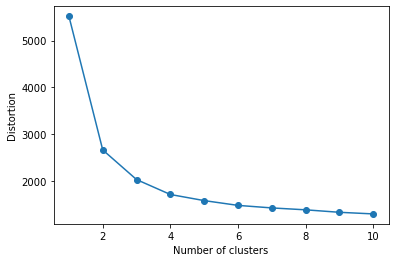

In [39]:
plot_distortion(X,max_clusters=10)

In [40]:
# 2 Cluster as per elbow
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ [0:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [41]:
# add clustering labels
neighborhoods_care_sorted_KM = neighborhoods_care_sorted
neighborhoods_care_sorted_KM.insert(0, 'Cluster tag', kmeans.labels_)


 

In [42]:
neighborhoods_care_sorted_KM

,Cluster tag,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Adelphi,Medical Lab,Optometrist,Doctor's Office,Family Medicine Doctor,Health and Medicine,Psychiatrist,Hospital,Internal Medicine Doctor,Dentist,Nursing Home
1,1,Allerton,Doctor's Office,Health and Medicine,Hospital,Dentist,Nursing Home,Chiropractor,Family Medicine Doctor,Home Health Care Service,Internal Medicine Doctor,Nutritionist
2,1,Annadale,Doctor's Office,Health and Medicine,Internal Medicine Doctor,Hospital,Dentist,General Surgeon,Chiropractor,Optometrist,Nutritionist,Nursing Home
3,1,Arverne,Nursing Home,Chiropractor,Dentist,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist
4,1,Aspen Knolls,Doctor's Office,Dentist,Hospital,Optometrist,Chiropractor,Internal Medicine Doctor,Urgent Care Center,Psychiatrist,Veterinarian,Health and Medicine
...,...,...,...,...,...,...,...,...,...,...,...,...
271,1,Williamsburg,Chiropractor,Internal Medicine Doctor,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Ophthalmologist,Nursing Home,Dentist,Medical Lab,Hospital
272,1,Willowbrook,Health and Medicine,Veterinarian,Doctor's Office,Family Medicine Doctor,Urgent Care Center,Hospital,Pediatrician,Nursing Home,Ophthalmologist,Psychiatrist
273,1,Wingate,Doctor's Office,Health and Medicine,Hospital,Chiropractor,Optometrist,Medical Center,Dentist,Nursing Home,Nutritionist,Ophthalmologist
274,1,Woodhaven,Doctor's Office,Health and Medicine,Nursing Home,Dentist,Hospital,Internal Medicine Doctor,Urgent Care Center,General Surgeon,Optometrist,Medical Lab


In [43]:
manhattan_merged = df.copy()

# merge to add latitude/longitude for each neighborhood
manhattan_merged1 = manhattan_merged.merge(neighborhoods_care_sorted_KM, left_on='neighborhood', right_on='Neighborhood')


In [44]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged1['latitude'], manhattan_merged1['longitude'], manhattan_merged1['neighborhood'], manhattan_merged1['Cluster tag']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [45]:
# Find the most common venue for clusters

manhattan_cluster_KM1 = manhattan_merged1.loc[manhattan_merged1['Cluster tag'] == 0, manhattan_merged1.columns[[1] + list(range(5, manhattan_merged1.shape[1]))]]


In [46]:
manhattan_cluster_KM1['1st Most Common Venue'].value_counts()

Health and Medicine    14
Doctor's Office        12
Optometrist             1
Dentist                 1
Hospital                1
Name: 1st Most Common Venue, dtype: int64

In [47]:
manhattan_cluster_KM2 = manhattan_merged1.loc[manhattan_merged1['Cluster tag'] == 1, manhattan_merged1.columns[[1] + list(range(5, manhattan_merged1.shape[1]))]]


In [48]:
manhattan_cluster_KM2['1st Most Common Venue'].value_counts()

Doctor's Office             45
Health and Medicine         32
Dentist                     19
Medical Lab                 11
Optometrist                  8
Nursing Home                 5
Hospital                     5
Veterinarian                 4
Chiropractor                 4
Internal Medicine Doctor     2
Ophthalmologist              1
General Surgeon              1
Nutritionist                 1
Pediatrician                 1
Urgent Care Center           1
Name: 1st Most Common Venue, dtype: int64

In [49]:
# Run silhouette score to evaluate model

from sklearn import metrics

silhouette_score = metrics.silhouette_score(manhattan_grouped_scaled, kmeans.labels_, metric='euclidean')

print("Silhouette Score of KMeans: ", silhouette_score)


Silhouette Score of KMeans:  0.6168916107611128


In [50]:
# Import HC for clustering and plot dendrogram

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

def plot_dendrogram(X, method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel("Points")
    plt.show()
                             

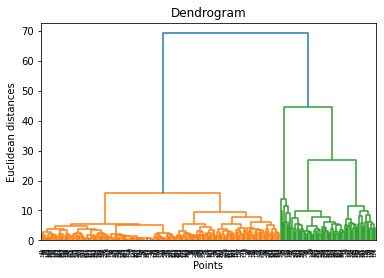

In [51]:
plot_dendrogram(X)

# Dendrogram shows 2 clusters

In [52]:
from sklearn.cluster import AgglomerativeClustering
import sklearn

ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)



In [53]:
y_hc = ac.fit_predict(X)


In [54]:
neighborhoods_care_sorted.insert(0, 'Cluster label', y_hc)

In [55]:
neighborhoods_care_sorted_HC = neighborhoods_care_sorted.drop(columns='Cluster tag')

neighborhoods_care_sorted_HC

,Cluster label,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Adelphi,Medical Lab,Optometrist,Doctor's Office,Family Medicine Doctor,Health and Medicine,Psychiatrist,Hospital,Internal Medicine Doctor,Dentist,Nursing Home
1,1,Allerton,Doctor's Office,Health and Medicine,Hospital,Dentist,Nursing Home,Chiropractor,Family Medicine Doctor,Home Health Care Service,Internal Medicine Doctor,Nutritionist
2,1,Annadale,Doctor's Office,Health and Medicine,Internal Medicine Doctor,Hospital,Dentist,General Surgeon,Chiropractor,Optometrist,Nutritionist,Nursing Home
3,1,Arverne,Nursing Home,Chiropractor,Dentist,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist
4,1,Aspen Knolls,Doctor's Office,Dentist,Hospital,Optometrist,Chiropractor,Internal Medicine Doctor,Urgent Care Center,Psychiatrist,Veterinarian,Health and Medicine
...,...,...,...,...,...,...,...,...,...,...,...,...
271,1,Williamsburg,Chiropractor,Internal Medicine Doctor,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Ophthalmologist,Nursing Home,Dentist,Medical Lab,Hospital
272,1,Willowbrook,Health and Medicine,Veterinarian,Doctor's Office,Family Medicine Doctor,Urgent Care Center,Hospital,Pediatrician,Nursing Home,Ophthalmologist,Psychiatrist
273,1,Wingate,Doctor's Office,Health and Medicine,Hospital,Chiropractor,Optometrist,Medical Center,Dentist,Nursing Home,Nutritionist,Ophthalmologist
274,1,Woodhaven,Doctor's Office,Health and Medicine,Nursing Home,Dentist,Hospital,Internal Medicine Doctor,Urgent Care Center,General Surgeon,Optometrist,Medical Lab


In [56]:
from sklearn import metrics

silhouette_score_HC = metrics.silhouette_score(manhattan_grouped_scaled, y_hc, metric='euclidean')

print("Silhouette score of HC:", silhouette_score_HC)



Silhouette score of HC: 0.46064129239482243


In [57]:
hc_clusters = 3

manhattan_merged = df.copy()

# merge to add latitude/longitude for each neighborhood
manhattan_merged_HC = manhattan_merged.merge(neighborhoods_care_sorted_HC, left_on='neighborhood', right_on='Neighborhood')

In [58]:
manhattan_cluster_HC1 = manhattan_merged_HC.loc[manhattan_merged_HC['Cluster label'] == 0, manhattan_merged_HC.columns[[1] + list(range(5, manhattan_merged_HC.shape[1]))]]


In [59]:
manhattan_cluster_HC2 = manhattan_merged_HC.loc[manhattan_merged_HC['Cluster label'] == 1, manhattan_merged_HC.columns[[1] + list(range(5, manhattan_merged_HC.shape[1]))]]


In [60]:
manhattan_cluster_HC3 = manhattan_merged_HC.loc[manhattan_merged_HC['Cluster label'] == 2, manhattan_merged_HC.columns[[1] + list(range(5, manhattan_merged_HC.shape[1]))]]


In [61]:
manhattan_cluster_HC1.head()

,longitude,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,-73.915654,Astoria,Health and Medicine,Hospital,Doctor's Office,Internal Medicine Doctor,Dentist,Chiropractor,Optometrist,Ophthalmologist,Nursing Home,Medical Lab
6,-73.998752,Bath Beach,Doctor's Office,Health and Medicine,Hospital,Dentist,Nursing Home,Physical Therapy Clinic,Home Health Care Service,Internal Medicine Doctor,Optometrist,Chiropractor
10,-73.774274,Bayside,Doctor's Office,Health and Medicine,Hospital,Optometrist,Dentist,Family Medicine Doctor,Nursing Home,Pediatrician,Internal Medicine Doctor,Medical Lab
11,-73.765968,Bayswater,Health and Medicine,Nursing Home,Dentist,Doctor's Office,Hospital,General Surgeon,Home Health Care Service,Internal Medicine Doctor,Optometrist,Chiropractor
13,-73.738892,Bellaire,Health and Medicine,Hospital,Internal Medicine Doctor,Doctor's Office,Dentist,Nursing Home,Optometrist,Veterinarian,General Surgeon,Home Health Care Service


In [62]:
manhattan_cluster_HC1['1st Most Common Venue'].value_counts()

Health and Medicine    22
Doctor's Office        17
Dentist                 8
Hospital                4
Optometrist             2
Nursing Home            2
Name: 1st Most Common Venue, dtype: int64

In [63]:
manhattan_cluster_HC2['1st Most Common Venue'].value_counts()

Doctor's Office             39
Health and Medicine         19
Dentist                     11
Medical Lab                 11
Optometrist                  7
Veterinarian                 4
Chiropractor                 4
Nursing Home                 3
Internal Medicine Doctor     2
Hospital                     2
Ophthalmologist              1
General Surgeon              1
Nutritionist                 1
Pediatrician                 1
Urgent Care Center           1
Name: 1st Most Common Venue, dtype: int64

In [64]:
manhattan_cluster_HC3['1st Most Common Venue'].value_counts()

Health and Medicine    5
Dentist                1
Doctor's Office        1
Name: 1st Most Common Venue, dtype: int64

In [65]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(zoom_start=11)

# set color scheme for the clusters
x = np.arange(hc_clusters)
ys = [i + x + (i*x)**2 for i in range(hc_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged_HC['latitude'], manhattan_merged_HC['longitude'], manhattan_merged_HC['neighborhood'], manhattan_merged_HC['Cluster label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters